# Notebook for Initial Basic LR Model

In [6]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Notebook Options
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pd.options.display.max_columns = None
pd.options.display.width = None

In [7]:
# Import Baseline DF for Modeling
baseline_df = pd.read_csv('../data/baseline_df.csv')
baseline_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,address,lat,long,renovated,zip,month,year
0,7399300360,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,3,6,Gas,PUBLIC,1180,0,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0,98055,5,2022
1,8910500230,920000.0,5,2.5,2770,6703,1.0,0,0,1,2,2,6,Oil,PUBLIC,1570,1570,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0,98133,12,2021
2,1180000275,311000.0,6,2.0,2880,6156,1.0,0,0,0,2,2,6,Gas,PUBLIC,1580,1580,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0,98178,9,2021
3,1604601802,775000.0,3,3.0,2160,1400,2.0,0,0,0,2,2,8,Gas,PUBLIC,1090,1070,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0,98118,12,2021
4,8562780790,592500.0,2,2.0,1120,758,2.0,0,0,1,0,2,6,Electricity,PUBLIC,1120,550,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0,98027,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,7834800180,1555000.0,5,2.0,1910,4000,1.5,0,0,0,0,3,7,Oil,PUBLIC,1600,1130,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,0,98103,11,2021
29187,194000695,1313000.0,3,2.0,2020,5800,2.0,0,0,0,1,2,6,Gas,PUBLIC,2020,0,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,0,98116,6,2021
29188,7960100080,800000.0,3,2.0,1620,3600,1.0,0,0,1,0,2,6,Gas,PUBLIC,940,920,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,0,98122,5,2022
29189,2781280080,775000.0,3,2.5,2570,2889,2.0,0,0,0,0,2,7,Gas,PUBLIC,1830,740,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,0,98055,2,2022


In [12]:
# Drop id and adress columns
baseline_df = baseline_df.drop(columns=['id', 'address'])
baseline_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,renovated,zip,month,year
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,3,6,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.19052,0,98055,5,2022
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,2,2,6,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.35591,0,98133,12,2021
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,2,2,6,Gas,PUBLIC,1580,1580,0,0,1956,47.502045,-122.22520,0,98178,9,2021
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,2,2,8,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.29020,0,98118,12,2021
4,592500.0,2,2.0,1120,758,2.0,0,0,1,0,2,6,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.07188,0,98027,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,1555000.0,5,2.0,1910,4000,1.5,0,0,0,0,3,7,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.32940,0,98103,11,2021
29187,1313000.0,3,2.0,2020,5800,2.0,0,0,0,1,2,6,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.38851,0,98116,6,2021
29188,800000.0,3,2.0,1620,3600,1.0,0,0,1,0,2,6,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.29585,0,98122,5,2022
29189,775000.0,3,2.5,2570,2889,2.0,0,0,0,0,2,7,Gas,PUBLIC,1830,740,480,100,2006,47.449490,-122.18908,0,98055,2,2022


In [13]:
baseline_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'lat', 'long', 'renovated',
       'zip', 'month', 'year'],
      dtype='object')

In [18]:
baseline_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
greenbelt          int64
nuisance           int64
view               int64
condition          int64
grade              int64
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
lat              float64
long             float64
renovated          int64
zip                int64
month              int64
year               int64
dtype: object

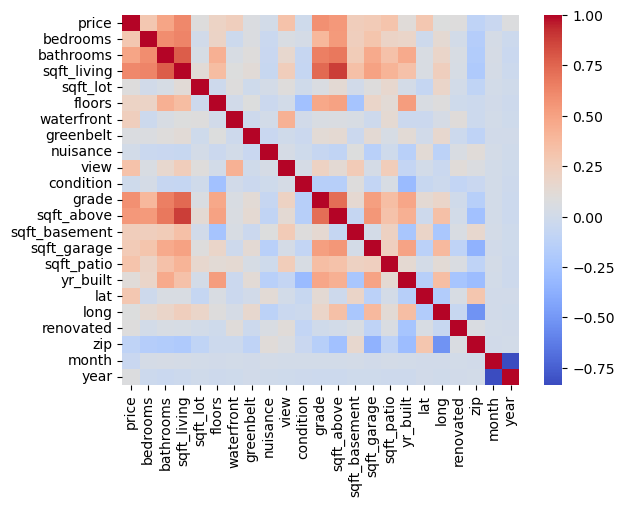

In [14]:
# Look at heatmap here
#Visualising the data using heatmap
plt.figure()
sns.heatmap(baseline_df.corr(),cmap='coolwarm')
plt.show()

## Heat Map Findings
### sqft_living and grade appear most highly correlated

In [15]:
# Dont think we'll need this
# # Drop id & address columns prior to running baseline model
# baseline_df_trimmed = baseline_df.drop(columns = ['id', 'address', 'heat_source', 'sewer_system'])
# baseline_df_trimmed

# Linear Regression Modeling

## Linear Regression Model #1
### Look just at the relationship between square footage of living space and price

- X = baseline_df_trimmed['sqft_living']
- y = baseline_df_trimmed['price']

In [21]:
# Convert living area series to np array and reshape
living_area = np.array(baseline_df['sqft_living']).reshape(-1,1)

## Declare features and target variable
X = living_area
y = baseline_df['price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [25]:
# feature_names = lr[:-1].get_feature_names_out()

# coefs = pd.DataFrame(
#     lr[-1].regressor_.coef_,
#     columns=["Coefficients"],
#     index=feature_names,)

# coefs


In [28]:
# Evaluate model 1 results
#Calculate intercept and coefficient
print(lr.intercept_)
print(lr.coef_)
# predictions = pred.reshape(-1,1)
#Calculate root mean squared error to evaluate model performance
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

-83624.61075494089
[560.99272779]
MSE :  416986322939.43317
RMSE :  645744.781581263


In [30]:
# Calculate Regression Results
def regression_results(y_test, y_pred):
    
    # Compute regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    
    # Display formatted metrics
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [32]:
regression_results(y_test,y_pred)

explained_variance:  0.4313
mean_squared_log_error:  0.2406
r2:  0.4312
MAE:  393648.5779
MSE:  416986322939.4332
RMSE:  645744.7816


## Without transformations, the model only using sqft_living as a feature has an r2 value of .43

# Check for outliers in numeric features


<AxesSubplot: >

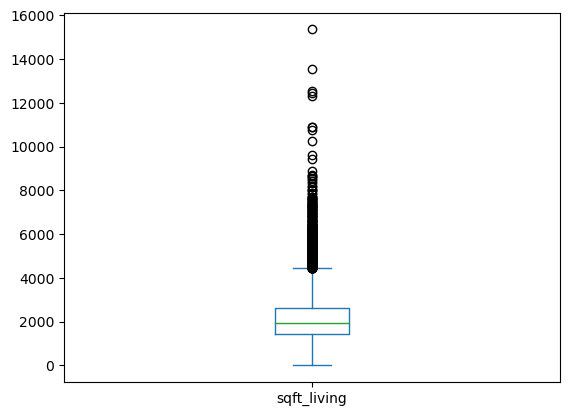

In [34]:
# Check sqft_living for outliers
baseline_df['sqft_living'].plot(kind='box')

<AxesSubplot: ylabel='Density'>

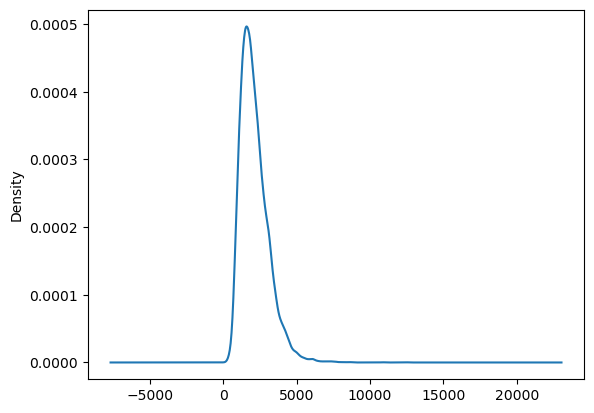

In [38]:
baseline_df['sqft_living'].plot.density()

In [41]:
baseline_df['sqft_living'].value_counts().sort_index(ascending=True)

3        1
260      1
290      3
310      1
320      3
        ..
12300    1
12470    1
12540    1
13540    1
15360    1
Name: sqft_living, Length: 1296, dtype: int64

In [42]:
baseline_df['grade'].value_counts().sort_index(ascending=True)

1         1
2         8
3        44
4       385
5      2848
6     11553
7      8860
8      3594
9      1350
10      402
11      122
12       24
Name: grade, dtype: int64

In [44]:
baseline_df['condition'].value_counts()

2    17603
3     8046
4     3258
1      224
0       60
Name: condition, dtype: int64

## Linear Regression Model #2
### Look just at the relationship between square footage of living space and price

- X = baseline_df_trimmed['sqft_living']
- y = baseline_df_trimmed['price']

In [11]:
## Declare features and target variable
X = baseline_df_trimmed.drop('price', axis=1)
y = baseline_df_trimmed['price']

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [13]:
# Baseline Model Results
r2_score = metrics.r2_score(y_test, y_pred)
print("R-squared score:", r2_score)

R-squared score: 0.6020785917606606


In [ ]:
def regression_results(y_true, y_pred):
    
    # Compute regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    # Display formatted metrics
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
# # Split our preprocessed data into our features and target arrays
# y = application_df["IS_SUCCESSFUL"].values
# X = application_df.drop(["IS_SUCCESSFUL"],1).values

# # Split the preprocessed data into a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# # Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)